<h1><center> BINARY LOGISTIC REGRESSION </center></h1>
    
<h5><CENTER>TEAM CONTRIBUTOR: ABDULLA MAMUN, RACHAEL OJOPAGOGO, MAPALO LUKASHI</CENTER></h5>

# Table of Contents
- Introduction
- Exploratory Data Analysis
- Data Preparation
- Prepared Data Review
- Regression Modeling
- Select Models
- Conclusion

# Introduction

Like many industries, the insurance industry is always interested in broadening its relationships with existing customers. To that end, insurance companies will often attempt to sell additional products to their existing customers. For example, if you have a homeowner’s policy with a particular insurance company, they will likely try to also sell you an auto insurance policy, or perhaps a water damage supplemental policy to your homeowner’s policy, etc. 

__Problem Statement__

A large insurance company has given us a task with the development of a model that can predict whether or not a given existing customer is likely to purchase an additional insurance product from the company. The insurance company plans to use the output of such a model in an attempt to improve its customer retention and sales practices.

__Dataset Description__

The data set we will be using is sourced from a Kaggle contribution: [DATA](https://www.kaggle.com/rluyck/insurance-company?select=Customer_data.csv). The data set is comprised of more than 14,000 observations of 1 response/dependent variable (which indicates whether or not the new insurance product was purchased) and 14 explanatory/independent variables. The insurance company gathered data about customers to whom they offered the new product. 

A data dictionary for the dataset is provided below.

|Attribute  |Description          |
|-----------|---------------------|
|ID         |Unique customer identifier|
|TARGET     |Indicator of customer buying the new product (N = no, Y = yes)|
|Loyalty    |Customer loyalty level, from low to high (0 to 3), 99 = unclassified|
|Age        |Customer age in years|
|City       |Unique code per city (where the customer resides)|
|Age_p      |Age of customer’s partner in years|
|LOR        |Length of Relationship in years|
|LOR_m      |Length of customer’s relationship with company (in months)|
|Prod_A     |Customer previously bought Product A (0=no, 1=yes)|
|Type_A     |Type of product A|
|Turnover_A |Amount of money customer spent on Product A|
|Prod_B     |Customer previously bought Product B (0=no, 1=yes)|
|Type_B     |Type of product B|
|Turnover_B |Amount of money customer spent on Product B|
|Contract   |Type of contract|

## Project Goal

The primary purpose of this analysis is to identify and assess the key attributes that serve as predictors for whether a customer will purchase an additional product. By delving into a dataset containing various customer-related variables, we seek to unravel patterns and relationships that shed light on the factors influencing consumer decisions. The overarching goal is to equip the insurance firm with actionable insights, enabling them to tailor their marketing strategies effectively and enhance customer engagement.

- Acquire, explore, and prepare the dataset for analysis, including handling missing values and selecting relevant columns.

- Conduct EDA to gain insights into the distribution and relationships among selected variables, such as age, product types, and length of the customer-company relationship.

- Utilize scikit-learn to build logistic regression models, assessing the predictive qualities of variables and identifying the most accurate predictors.

- Analyze model outputs, including coefficients, accuracy to define the impact of each variable on the target outcome.

- Summarize findings, draw conclusive insights, and provide recommendations for further analysis or business strategy adjustments based on the model results. Show the best result model from multiple models comparison.

## Methodology

- Import the necessary python libraries.
- Load the data into Github Repository and then upload that data into python Jupyter Notebook using Pandas reader function.
- Read the data and their information like number of observations, features, data type, individual features missing values, punctuation, and other anomalies inside each feature.
- Visualize the statistical description of each features, creating Univariate, Bivariate, Multivariate analysis, dealing with missing values, duplicate values, outliers, collinearity, feature selection, standardization, model building and compare model performance among models by performance metrics.

In [1]:
%matplotlib inline

## Data Loading & Manipulation
Data is being loaded directly from the GitHub source link to the Jupyter notebook using the Pandas read CSV reader function. To load the data, it is also necessary to import necessary libraries like Pandas. To visualize the data insights, import visualization libraries like Matplotlib, Seaborn, and Plotly.

After loading the data, we will observe some characteristics of the data. For example, we will see the dimensions of the dataset, feature types, etc.

Import the useful libraries for this project data analysis and model building purpose.


In [2]:
# Importing libraries 
import numpy as np
import pandas as pd

# Import library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
from plotly.subplots import make_subplots


import math
import missingno as msno
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import shap
from sklearn.metrics import roc_curve, auc

# Import filterwarnngs  from warnings to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Sets the default figure size to 10 inches in width and 6 inches in height
plt.rcParams['figure.figsize'] = [10, 6] 

In [3]:
# Import github link for data source
source_url = 'https://raw.githubusercontent.com/mamun21616/DAV-6150/main/M7_Data.csv'
        
# Load the data in a variable name customer_df which means customer dataframe
customer_df = pd.read_csv(source_url)

# Show the first five rows of the dataset
customer_df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [4]:
# Display the dataset total attributes and observations
customer_df.shape

(14016, 15)

The total number of observations are 14016 and attributes are 15.

In [5]:
# Show the details about the dataset information
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


Dataset observation:

- This is a type of Pandas Dataframe.

- Index ranges from 0-14016.

- Total number of attributes are 15.

- Majority of the attributes showing  numerical data type. Only one of them is categorical.

- Dataset used computer memory 1,6+ MB.

In [6]:
# Check the data types for each variable
customer_df.dtypes

TARGET         object
loyalty         int64
ID              int64
age             int64
city            int64
LOR             int64
prod_A          int64
type_A          int64
type_B          int64
prod_B          int64
turnover_A    float64
turnover_B    float64
contract        int64
age_P           int64
lor_M           int64
dtype: object

Most features data types are correct, only target variable is object which we need to convert binary 1 and 0 from Y and N.

In [7]:
# The lambda function converts 'Y' to 1 and any other value to 0
customer_df['TARGET'] = customer_df['TARGET'].apply(lambda x: 1 if x == 'Y' else 0)

In [8]:
# Check data types after changing festures data tye
customer_df.dtypes

TARGET          int64
loyalty         int64
ID              int64
age             int64
city            int64
LOR             int64
prod_A          int64
type_A          int64
type_B          int64
prod_B          int64
turnover_A    float64
turnover_B    float64
contract        int64
age_P           int64
lor_M           int64
dtype: object

After changing data type, now looks better for all features data type in right format.

# Exploratory Data Analysis
Analyzing a data set for purposes of summarizing its characteristics, identifying relationships between its attributes, and discovering patterns, trends, outliers, missing values and invalid values within the data. In this EDA process start with Univariate analysis, bivariate analysis and multivariate analysis.

Now we will present the Descriptive Statistics for each variable.

In [9]:
# Display descriptive statistics for all columns, including object and categorical types
customer_df.describe()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.0,14016.000000,14016.000000
mean,0.429224,50.381778,37672.440068,35.882920,-710.950128,0.926299,0.533818,1.607877,1.918878,0.599458,379.161320,328.628207,2.0,35.882920,14.115582
std,0.494983,48.471790,44855.639209,12.974634,26702.329184,0.965212,0.498873,1.508991,1.686038,0.490026,92.612207,475.616525,0.0,12.974634,11.582550
min,0.000000,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,0.000000,2.000000,6741.500000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.919412,219.406925,2.0,25.000000,3.000000
50%,0.000000,3.000000,13514.500000,33.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,367.891493,237.656757,2.0,33.000000,15.000000
75%,1.000000,99.000000,62738.000000,43.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,399.744924,264.131538,2.0,43.000000,15.000000
max,1.000000,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


__Observations:__

The mean TARGET value is 0.429, which means that average 42.9% of the customers have boaught the new product. The mean age is 35.8 years, which suggests that the customers are relatively young. The mean lor_M score is 14.11, which suggests that the customers are generally loyal. The mean prod_A usage is 0.53, which suggests that the customers use product A moderately. The mean turnover_A is 379.16, which suggests that the customers generate a significant amount of revenue for the company.

The standard deviation of most variables is relatively high, which suggests that there is a lot of variation in the data. The minimum and maximum values for most variables are also quite different, which further supports the conclusion that there is a lot of variation in the data.

The 25th, 50th, and 75th percentiles provide a more detailed picture of the distribution of the data. For example, the 25th percentile for lor_M is 3.00, which means that 25% of the customers have a loyalty score of 3.00 or less. The 50th percentile for lor_M is 15.00, which means that 50% of the customers have a loyalty score of 15.00 or less. The 75th percentile for lor_M is 15.00, which means that 75% of the customers have a loyalty score of 15.00 or less. 

## Check the duplicate values

In [10]:
# Find duplicate rows in the DataFrame based on all columns
duplicates = customer_df[customer_df.duplicated()]

# Display duplicate rows
duplicates

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
11008,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
11009,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
11010,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
11011,1,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
11012,1,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,1,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,1,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,1,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,1,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


 There are 3008 rows that have identical values in all columns with some previous row. This is really huge , its almost 22% of our entire dataset.
 We want to keep the first occurrence of each duplicated row and drop the subsequent ones.

## Identify null values

In [11]:
# Check for missing values
customer_df.isnull().sum()

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64

There is no null values in our dataset.

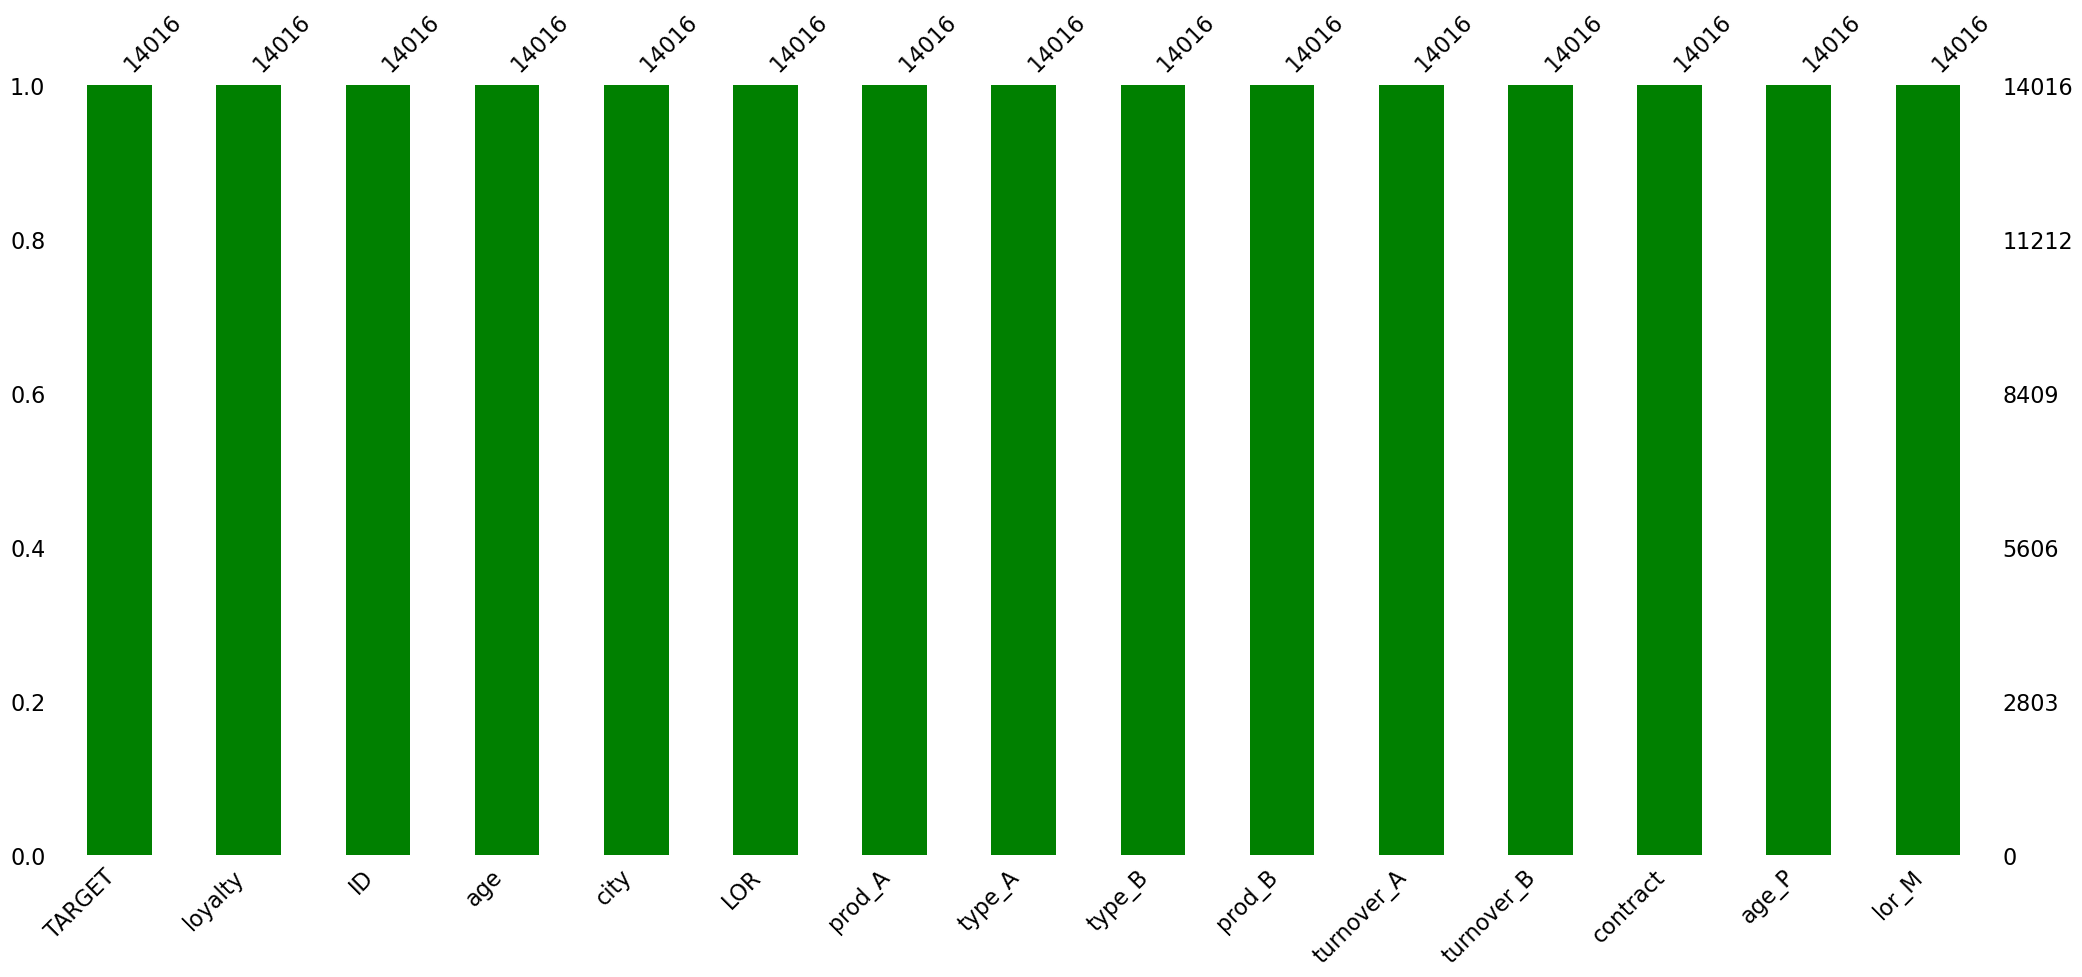

In [12]:
# Create a bar chart visualization of missing values
msno.bar(customer_df, color='green')

# Display the plot
plt.show();

## Univariate Analysis
Univariate analysis is a statistical method used to analyze and describe the distribution of a single variable. In other words, it involves the examination of a single characteristic or attribute at a time. The primary goal of univariate analysis is to summarize and understand the basic features of a single variable, which could be numerical or categorical.

*__1. Distribution of TARGET variable__*

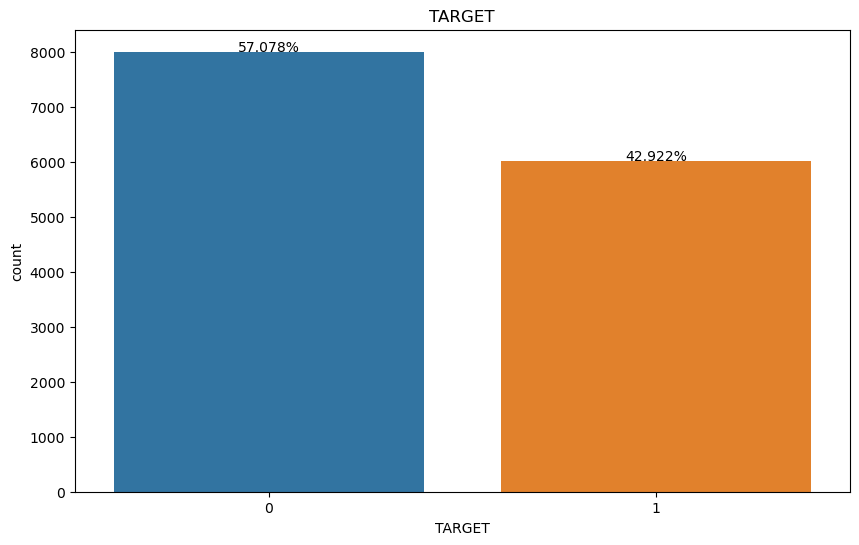

In [13]:
ax = sns.countplot(x="TARGET", data=customer_df)
plt.title('TARGET')

total = len(customer_df['TARGET'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")


One represents customer bought the new product and zero represents customer has not bought the new product. Here number of '1' is less than '0'. So, more customers have not bought the new product.

In [14]:
customer_df.groupby('TARGET').mean()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
TARGET,,,,,,,,,,,,,,
0,39.791625,8366.446750,33.027125,-747.257125,1.081375,0.673000,2.025000,2.411625,0.74475,360.368141,371.263176,2.0,33.027125,15.976500
1,64.464428,76643.175864,39.680519,-662.669548,0.720080,0.348737,1.053191,1.263630,0.40625,404.152250,271.932769,2.0,39.680519,11.640957


Observations:

The average age of customers who bought the product is higher at around 39 years old than those who didn't buy at around 33 years old.
The customers who purchased have a higher average loyalty score than those who didn't.

*__2. Display the type A & type B category and their frequency distribution on bar plot__*

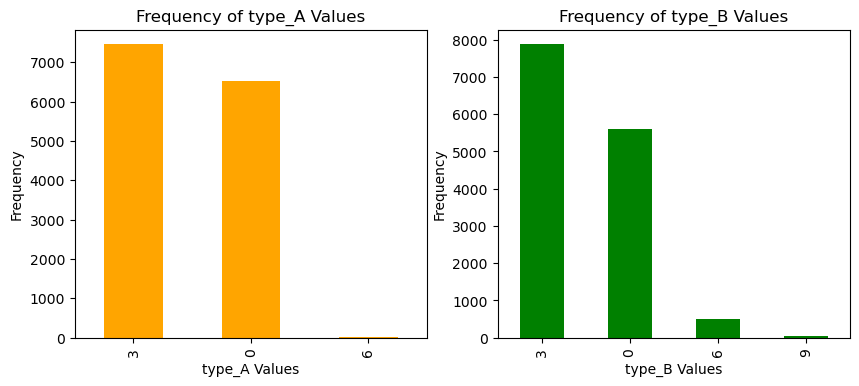

In [15]:
# Create bar plots for 'type_A' and 'type_B'
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1) # This is axis level for plot 1

# Calculate value counts of each type_A value and showing bar chart with .plot method
customer_df['type_A'].value_counts().plot(kind ='bar', color = 'orange')

# Set plot label and title
plt.title('Frequency of type_A Values')
plt.xlabel('type_A Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # Axis level for plot 2
# Calculate value counts of each type_B value and showing bar chart with .plot method
customer_df['type_B'].value_counts().plot(kind ='bar', color = 'green')

# Set plot label and title
plt.title('Frequency of type_B Values')
plt.xlabel('type_B Values')
plt.ylabel('Frequency');

__Observation:__

For product type A has 3 categories, category 6 has only 23 values, 0 has about 4575 values and 3 has 6410 values. 
For product type B has 4 categories. Category 6 has 452 value & 9 has very less values, zero has about 3828 values and 3 has highest 6695 values.

*__3. Displaying the AGE attribute distribution with histogram, KDE plot and Box plot__*

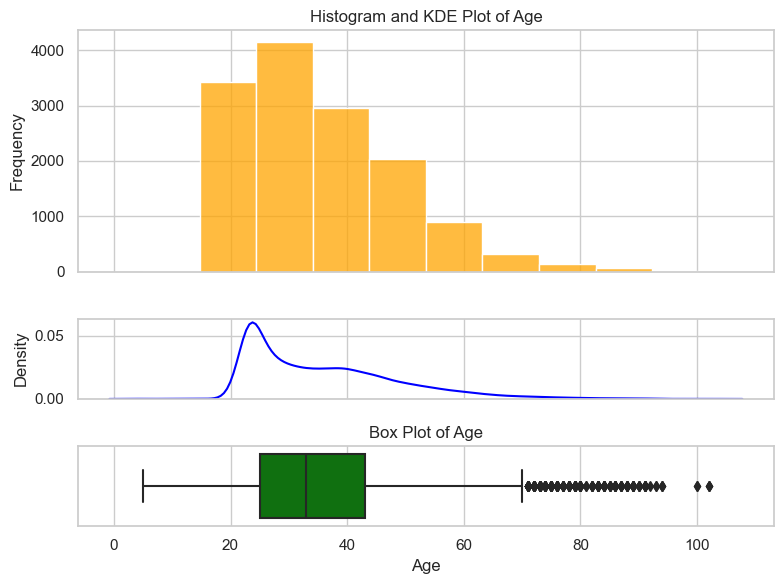

In [16]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a figure with three subplots
fig, (ax_hist, ax_kde, ax_box) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (0.6, 0.2, 0.2)}, figsize=(8, 6))

# Plot the histogram
sns.histplot(customer_df['age'], bins=10, kde=False, color='orange', ax=ax_hist)

# Plot the KDE plot
sns.kdeplot(customer_df['age'], color='blue', ax=ax_kde)

# Plot the box plot
sns.boxplot(x='age', data=customer_df, color='green', ax=ax_box)

# Add labels and title
ax_hist.set(xlabel=None, ylabel='Frequency', title='Histogram and KDE Plot of Age')
ax_kde.set(xlabel=None, ylabel='Density')
ax_box.set(xlabel='Age', ylabel=None, title='Box Plot of Age')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show();


Observation:

The Histogram of age distribution is right skewed where few observations are far away from the mean indicatin the presence of outliers. We can see also the same skewedness in the curve from KDE plot. And its very clear from box plot, where majority ages people lies from 24-43 and many people have ages more than 70 where median is 33. There is 2 observation above 100 which is not normal. Beyond the whisker those observation also are outliers.

*__4. Customers purchasing amount for product A__*

In [17]:
# Counting the number of occurrences of each unique values in the 'prod_A' column of the DataFrame
customer_df.prod_A.value_counts()

1    7482
0    6534
Name: prod_A, dtype: int64

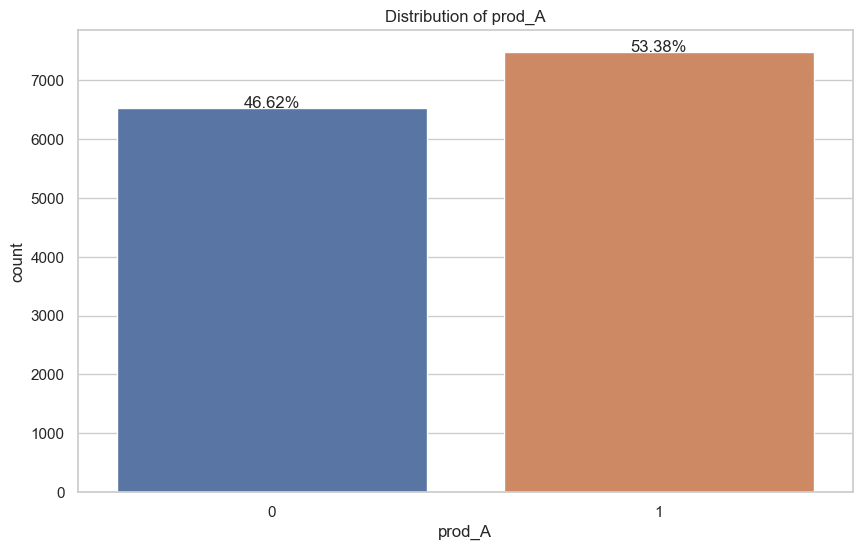

In [18]:
# Create a count plot using Seaborn
ax = sns.countplot(x="prod_A", data=customer_df)

# Set the title of the plot
plt.title('Distribution of prod_A')

# Get the total number of data points in the 'prod_A' column
total = len(customer_df['prod_A'])

# Add percentage labels on top of each bar
for p in ax.patches:
    # Get the height of the bar
    height = p.get_height()

    # Add the percentage label above each bar
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,  # Adjust the vertical position of the label
            '{:1.2f}%'.format(100 * (height / total)),
            ha="center")  # Center the label horizontally

# Show the plot
plt.show();

Product A purchasing behavior to "YES" again from previous shopping indicate 1 and those number of frequency is higher than 0. So more people buy from previously bought trend. 

*__5. Displaying the Length of relationship with customers in month (LOR_M) distribution using Histogram, KDE and Box plot__*

In [19]:
# Displaying statistical summary for the 'lor_M' column in the DataFrame 'customer_df'.
customer_df.lor_M.describe()

count    14016.000000
mean        14.115582
std         11.582550
min          3.000000
25%          3.000000
50%         15.000000
75%         15.000000
max         75.000000
Name: lor_M, dtype: float64

This summary provides a quick overview of the distribution and central tendency of the 'lor_M' data.

Useful for understanding the range, spread, and general patterns in the 'lor_M' values.

We can see the average age, minimum, maximum, standard deviation, median, 25th percentile and 75th percentile value of age attribute.

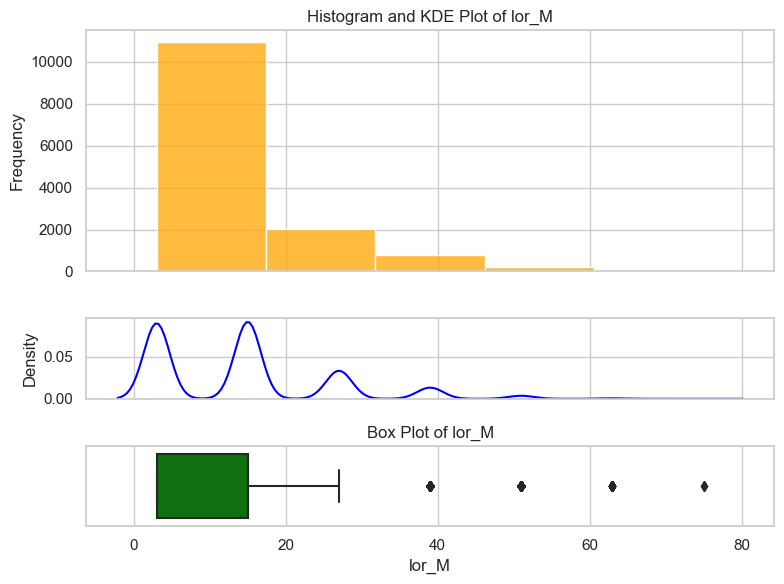

In [20]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a figure with three subplots
fig, (ax_hist, ax_kde, ax_box) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (0.6, 0.2, 0.2)}, figsize=(8, 6))

# Plot the histogram
sns.histplot(customer_df['lor_M'], bins=5, kde=False, color='orange', ax=ax_hist)

# Plot the KDE plot
sns.kdeplot(customer_df['lor_M'], color='blue', ax=ax_kde)

# Plot the box plot
sns.boxplot(x='lor_M', data=customer_df, color='green', ax=ax_box)

# Add labels and title
ax_hist.set(xlabel=None, ylabel='Frequency', title='Histogram and KDE Plot of lor_M')
ax_kde.set(xlabel=None, ylabel='Density')
ax_box.set(xlabel='lor_M', ylabel=None, title='Box Plot of lor_M')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show();

Distribution of length of month customers relationship are uneven where all data points lies in between 3-17 months, very few customers have long time relationship.

KDE plot look like binomial where have two peak at 3 and 15 (approximate).
Box plot green color box created only with major data and few observations are far away from the whisker, they are outliers. For these outliers, we cannot see any median and full box with lower quartile and other parameters in box plot. Data is skewed. We need to do further analysis for outliers removal.

*__6. Displaying the customer turnover on product A distribution using Histogram, KDE and Box plot__*

In [21]:
# Generating a statistical summary for the 'turnover_A' column in the DataFrame 'customer_df'.
# The 'turnover_A' column likely represents a measure of turnover related to customer data.
customer_df.turnover_A.describe()

count    14016.000000
mean       379.161320
std         92.612207
min        300.095909
25%        334.919412
50%        367.891493
75%        399.744924
max       5568.784139
Name: turnover_A, dtype: float64

This summary provides insights into the distribution and central tendency of the 'turnover_A' data.

It helps to understand the range, spread, and general patterns in the 'turnover_A' values.

Useful for identifying outliers, assessing the overall variation, and gaining a quick overview of the data.

We can see already there is huge difference mean to standard deviation, minimum to maximum value. 

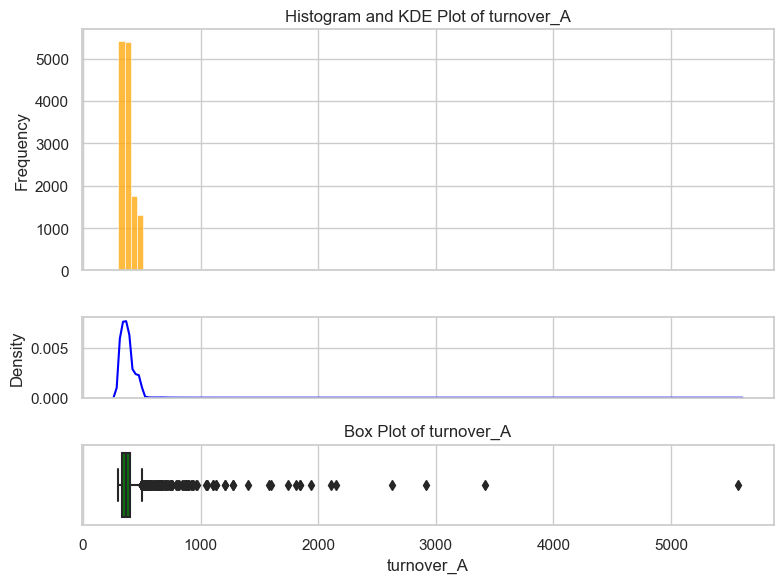

In [22]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a figure with three subplots
fig, (ax_hist, ax_kde, ax_box) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (0.6, 0.2, 0.2)}, figsize=(8, 6))

# Plot the histogram
sns.histplot(customer_df['turnover_A'], bins=100, kde=False, color='orange', ax=ax_hist)

# Plot the KDE plot
sns.kdeplot(customer_df['turnover_A'], color='blue', ax=ax_kde)

# Plot the box plot
sns.boxplot(x='turnover_A', data=customer_df, color='green', ax=ax_box)

# Add labels and title
ax_hist.set(xlabel=None, ylabel='Frequency', title='Histogram and KDE Plot of turnover_A')
ax_kde.set(xlabel=None, ylabel='Density')
ax_box.set(xlabel='turnover_A', ylabel=None, title='Box Plot of turnover_A')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show();

From the turnover data distribution over the box plot clearly visible that large number of observations are out of whiskers, those are outliers, they have strong effect on mean. 

## Bivariate Analysis

Bivariate analysis is a statistical method that involves the analysis of two variables simultaneously to understand the relationship between them. 

The primary goal is to determine whether there is a statistically significant association or correlation between the two variables.

*__1. Displaying the customer total turnover on each type of product, for type A__*

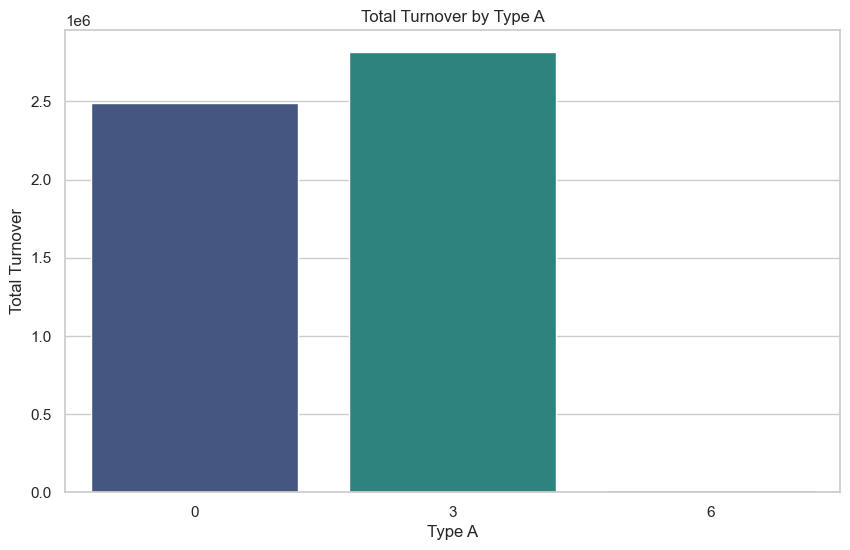

In [23]:
# Group by 'type_A' and sum the 'turnover_A' for each group
grouped_df = customer_df.groupby('type_A')['turnover_A'].sum().reset_index()

# Use a barplot to show the total turnover for each combination of 'typeA' and 'typeB'
sns.barplot(x='type_A', y='turnover_A', data=grouped_df, palette='viridis')

# Add labels and title
plt.xlabel('Type A')
plt.ylabel('Total Turnover')
plt.title('Total Turnover by Type A')

# Show the plot
plt.show();

Group 3 categories product type has the highest turnover.

*__2. Displaying the customer total turnover on each type of product, for type B__*

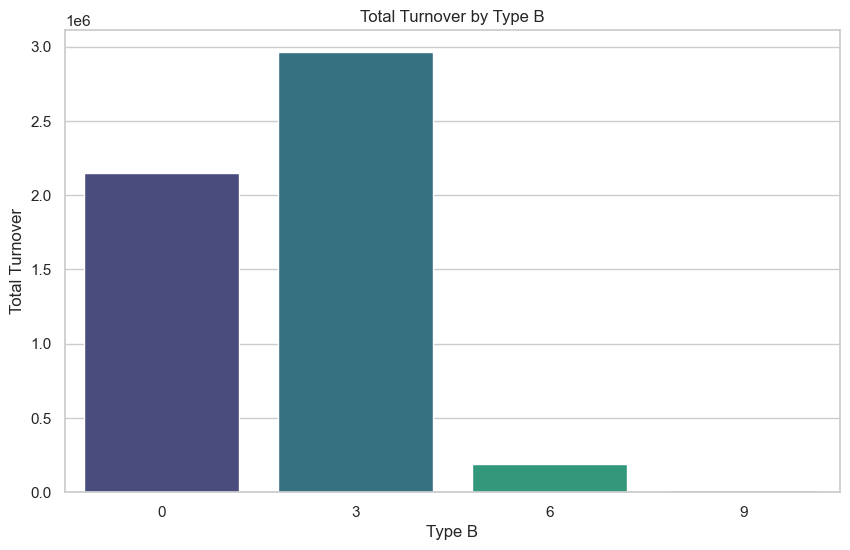

In [24]:
# Group by 'type_B' and sum the 'turnover_A' for each group
grouped_df = customer_df.groupby('type_B')['turnover_A'].sum().reset_index()

# Use a barplot to show the total turnover for each combination of 'typeA' and 'typeB'
sns.barplot(x='type_B', y='turnover_A', data=grouped_df, palette='viridis')

# Add labels and title
plt.xlabel('Type B')
plt.ylabel('Total Turnover')
plt.title('Total Turnover by Type B')

# Show the plot
plt.show();


In case of product type B also Group 3 categories has the highest turnover. Both type A and type B has category 3 was the highest turnover, 0 was the second highest turnover. These two categories are important for business.

*__3. Relationship between TARGET and AGE attribute__*

First we will convert the age in group and then find the relationship with the target for that age group of customer to purchase product or not.

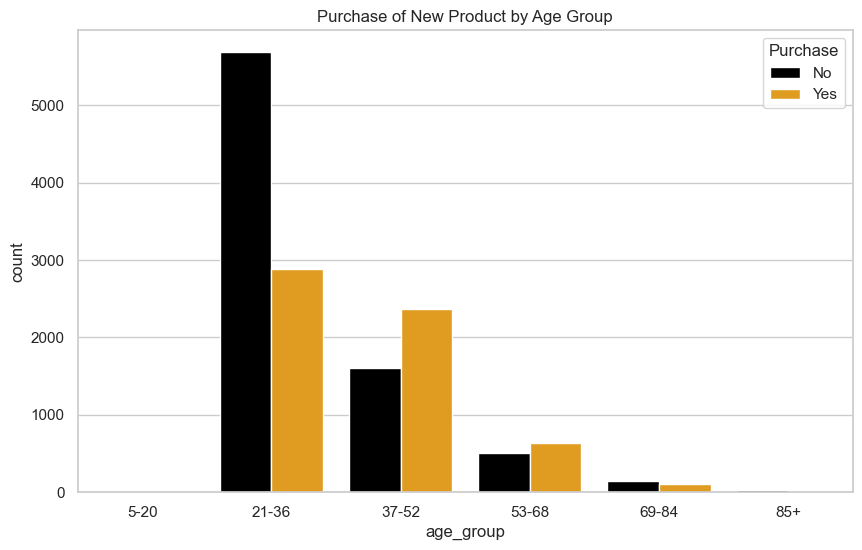

In [25]:
# Create a new column 'age_group' based on age ranges using pd.cut()
customer_df['age_group'] = pd.cut(customer_df['age'], bins=[5, 21, 37, 53, 69, 85, 102],
                                         labels=['5-20', '21-36', '37-52', '53-68', '69-84', '85+'])

# Create a countplot to visualize the distribution of 'age_group' with respect to the 'TARGET' variable
sns.countplot(x='age_group', hue='TARGET', data=customer_df, palette={1: 'orange', 0: 'black'})

# Add a title to the plot
plt.title('Purchase of New Product by Age Group')

# Add a legend to the plot to indicate the meaning of colors in the countplot
plt.legend(title='Purchase', loc='upper right', labels=['No', 'Yes'])

# Display the plot
plt.show();


Observation:In both cases were customer purchased or didn't purchase the product, age group ranges from 21-36 were the highest, but younger ages ages 5 to 20 are most likely not to buy new product and the same is true for ages ranged 85+.

*__4. Relationship with length of customer duration (LOR_M) with company and TARGET Attribute__*

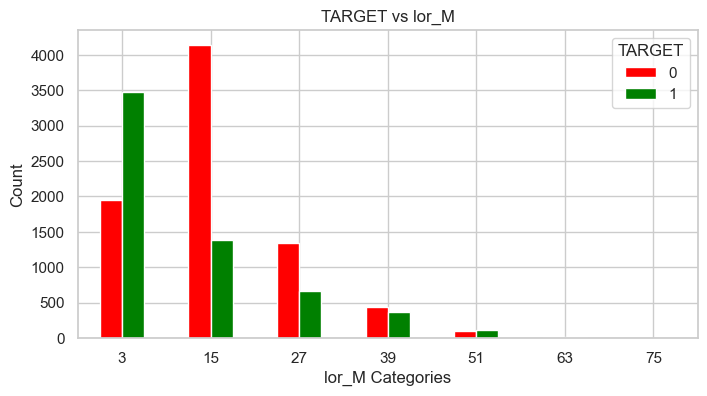

In [26]:
# Create a crosstab of 'lor_M' and 'TARGET' columns from the 'customer_df' DataFrame
Crosstab_result=pd.crosstab(index=customer_df['lor_M'],columns=customer_df['TARGET'])

#Plot the crosstab result as a bar plot
Crosstab_result.plot.bar(figsize=(8,4), rot=0,color=['red', 'green'])

plt.title('TARGET vs lor_M' )
plt.xlabel('lor_M Categories')
plt.ylabel('Count')

# Display the plot
plt.show();

In this graph, we can observe that approximate 3500 customers maintaining shorter relationship with company which is 3 month period have purchased a new product.  As we move further time duration 15 months, 27 and 39 months relationship we can see more customers did not purchased any product. 

It is very clear that as Length of customer relationship with company product purchase has negative relationship. As the relationship duration increases the purchasing amount is decreasing.

__5. Relation between loyalty and LOR_m__

**Classified loyalty less than 99**

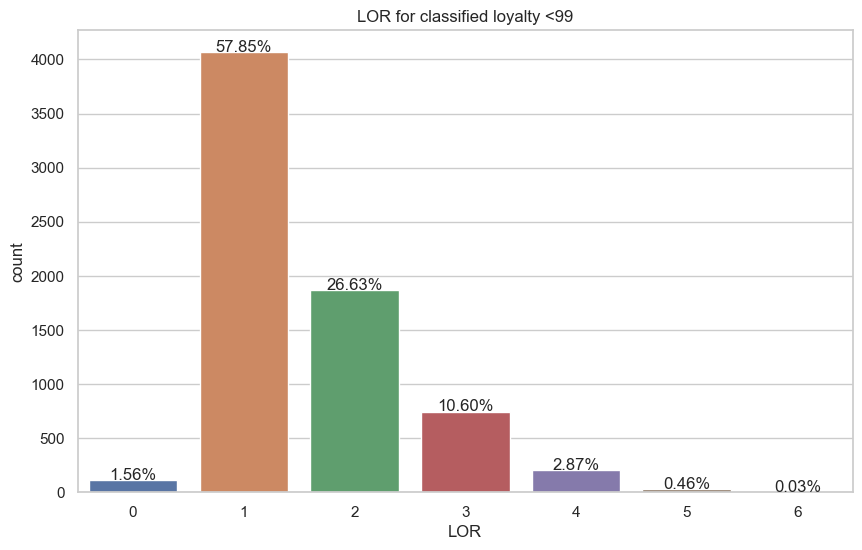

In [27]:
classified_loyalty = customer_df[customer_df['loyalty'] < 99]

# Create a count plot using Seaborn with 'LOR' on the x-axis from 'classified_loyalty' DataFrame
ax = sns.countplot(x="LOR", data=classified_loyalty)

# Set the title of the plot
plt.title('LOR for classified loyalty <99')

# Calculate the total number of data points in the 'LOR' column
total = len(classified_loyalty['LOR'])

# Iterate through each bar in the count plot
for p in ax.patches:
    # Get the height (count) of each bar
    height = p.get_height()

    # Display the percentage above each bar
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,  # Adjust the vertical position for the text
            '{:1.2f}%'.format(100 * (height / total)),  # Calculate and format the percentage
            ha="center")  # Set horizontal alignment to center

# Show the plot
plt.show();

For Length of relation with loyalty less than 99, as year of relationship increasing loyalty decreasing.
__Classified Loyalty equal 99__

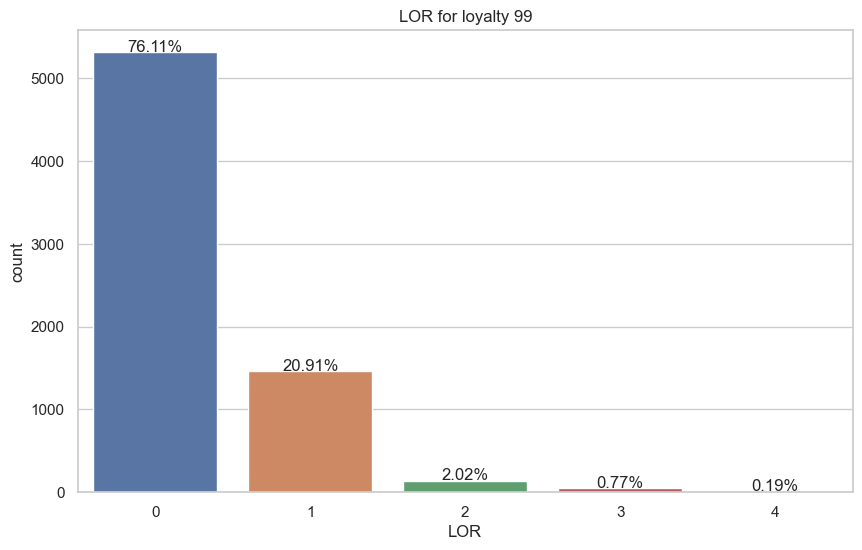

In [28]:
# Create new variable for unclassifies loyalty 
unclassified_loyalty = customer_df[customer_df['loyalty'] == 99]

# Create a count plot using Seaborn with 'LOR' on the x-axis from 'unclassified_loyalty' DataFrame
ax = sns.countplot(x="LOR", data=unclassified_loyalty)

# Set the title of the plot
plt.title('LOR for loyalty 99')

total = len(unclassified_loyalty['LOR'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*(height/total)),
            ha="center")

- Most unclassified samples are LOR 0, unfortunatly there are no LOR 0 value the classified and thus we can't impute based on that.In case of unclassified, loyalty also decreasing with LOR increasing.

__6. Age relationship with target, product A and product B__

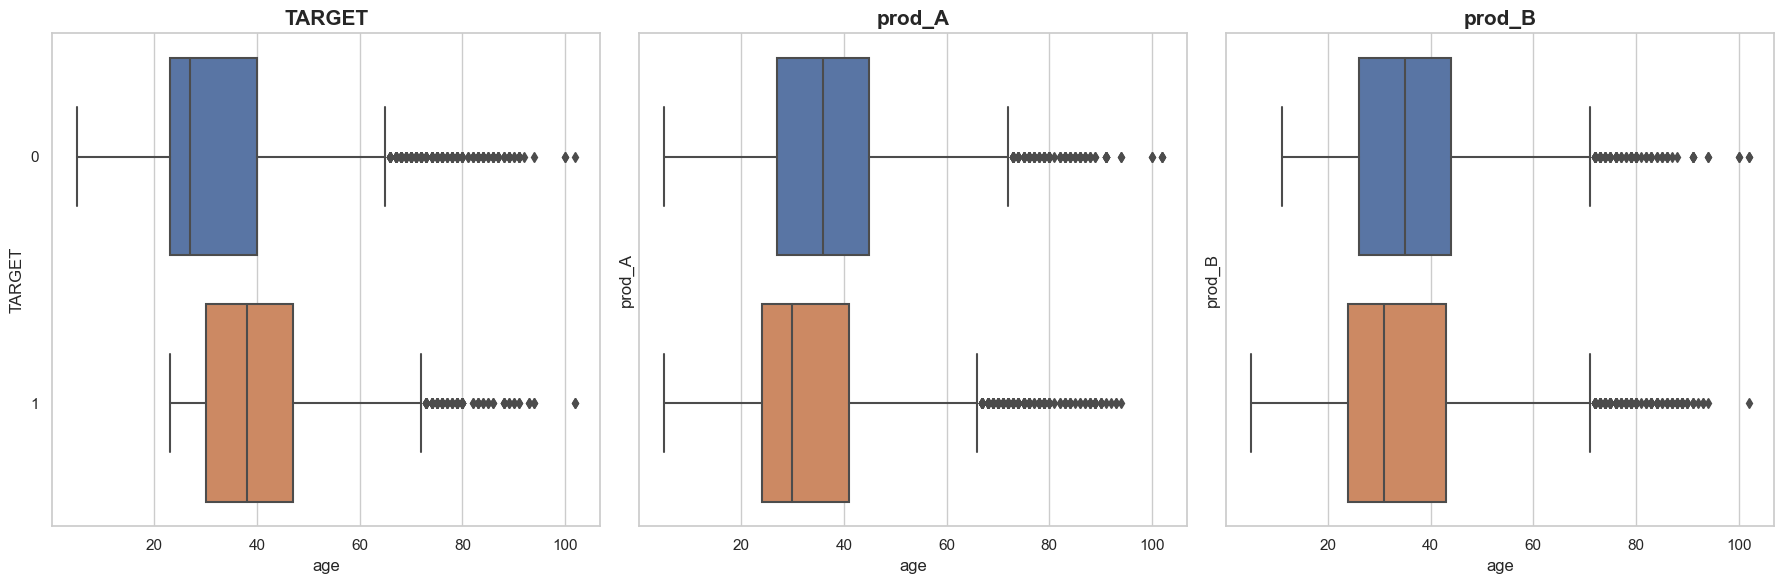

In [29]:
# Create subplots with 1 row and 3 columns and a shared y-axis
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Create a horizontal boxplot for 'TARGET' variable
# Set the boxplot in the first subplot (axs[0])
sns.boxplot(x="age", y="TARGET", ax=axs[0], data=customer_df, orient="h").set_title('TARGET', fontweight="bold", size=15)

# Create a horizontal boxplot for 'prod_A' variable
# Set the boxplot in the second subplot (axs[1])
sns.boxplot(x="age", y="prod_A", ax=axs[1], data=customer_df, orient="h").set_title('prod_A', fontweight="bold", size=15)

# Create a horizontal boxplot for 'prod_B' variable
# Set the boxplot in the third subplot (axs[2])
sns.boxplot(x="age", y="prod_B", ax=axs[2], data=customer_df, orient="h").set_title('prod_B', fontweight="bold", size=15)

# Adjust layout for better visualization
plt.tight_layout()

Customer not purchase new product median age was 23, where median age for purchase age was 38 approx. 
For Product A and B median for not purchase product age group was 38 and for purchase was 27 approx,
There is extreme value exists in all cases which are called outliers. Due to outliers median value changes.

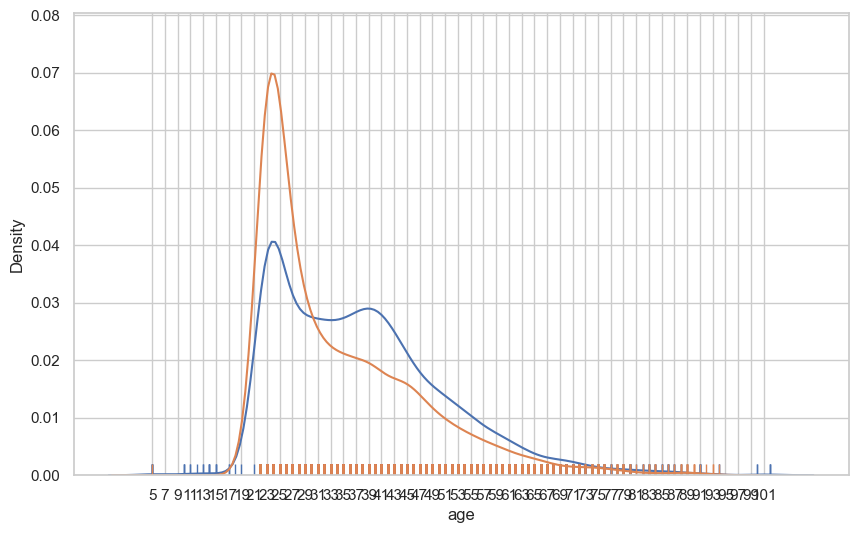

In [30]:
# Create two overlaid density plots using Seaborn
# One for 'prod_A' equal to 0 and another for 'prod_A' equal to 1
# The plots include both kernel density estimate (hist=False) and rug plots
sns_plot = sns.distplot(customer_df[customer_df['prod_A'] == 0]['age'], hist=False, rug=True)
sns_plot = sns.distplot(customer_df[customer_df['prod_A'] == 1]['age'], hist=False, rug=True)

# Add a legend to the figure with labels for each density plot
fig.legend(labels=['prod_A_0', 'prod_A_1'])

# Set x-axis ticks at intervals of 2 from the minimum to maximum age values
plt.xticks(np.arange(min(customer_df['age']), max(customer_df['age']) + 1, 2))

# Display the plot
plt.show();

Age group for purchase or not purchase for product A shows both cases are young people.

## Multivariate Analysis
Correlation matrix will help us to check the collinearity and relationship with target variable as well. 

<Axes: >

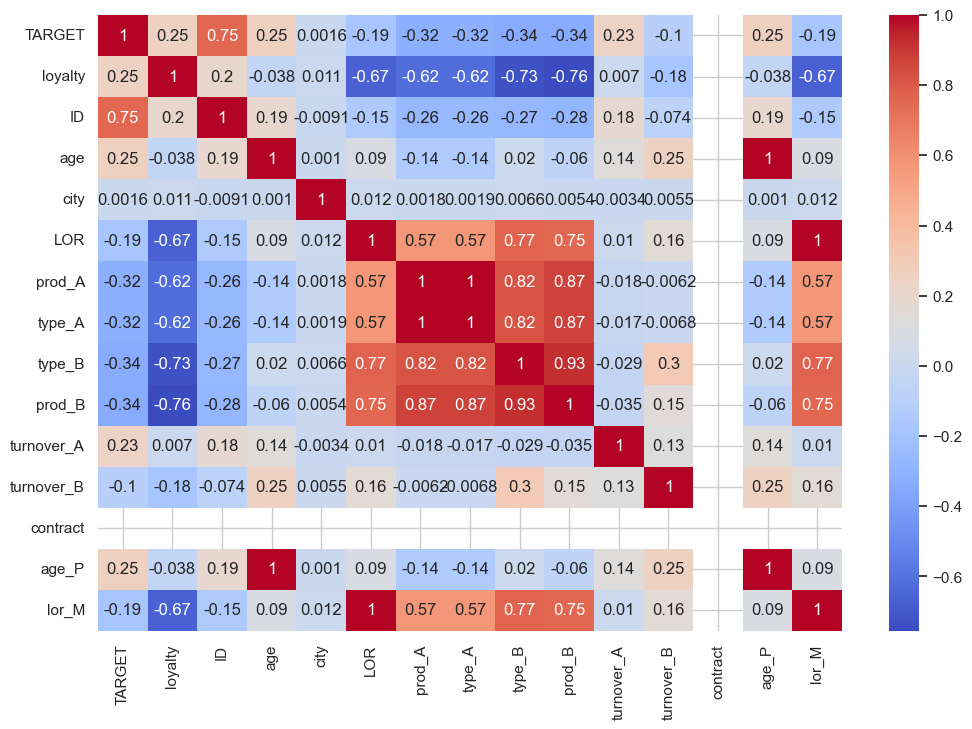

In [31]:
cm = customer_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm')

__Observation:__

- **contract** = constant variable = no information
- **prod_A and type_A** have correlation of 1 = redundant
- **age and age_p** have a correlation of 1 = duplicate
- **LOR and lor_M** have a correlation of 1 = duplicate
- **ID** is highly correlated with TARGET though redundant for use in our case as its a primary key.
- **Loyalty** is highly correlated with prod_A/Type_A and prod_B/Type A
- **Loyalty** is highly correlated with LOR and thus also lor_M
- collinearity (independent variables are correlated)

__VIF: Variance inflation factor__
It helps a formal detection-tolerance for multicollinearity. VIF of 5 or 10 and above (depends on the business problem) indicates a multicollinearity problem.

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_ = add_constant(customer_df)

In [33]:
# Identify non-numeric columns
non_numeric_columns = X_.select_dtypes(exclude=['number']).columns

# Exclude non-numeric columns
numeric_X = X_.drop(columns=non_numeric_columns)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_X.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_X.values, i) for i in range(numeric_X.shape[1])]

# Display the VIF for each variable
print(vif_data)


      Variable         VIF
0       TARGET    2.592551
1      loyalty    2.502648
2           ID    2.317402
3          age         inf
4         city    1.001148
5          LOR         inf
6       prod_A  128.938020
7       type_A  128.276594
8       type_B   12.080500
9       prod_B   13.196489
10  turnover_A    1.109301
11  turnover_B    1.633436
12    contract    0.000000
13       age_P         inf
14       lor_M         inf


VIF, or Variance Inflation Factor, is a measure used in regression analysis to quantify how much the variance of an estimated regression coefficient increases if your predictors are correlated. High VIF values indicate high multicollinearity, which can lead to issues in the model interpretation and affect the reliability of the regression coefficients. The interpretation for VIF results:
- inf - perfect multicollinearity for age_P, lor_M. 
- Turnover_A and B has Low correlation, not a significant concern.
- type_A: High correlation with other predictors.
- type_B: Moderately high correlation.
- prod_B: Moderately high correlation.

# Data Preparation

In Data Preparation we will, care about filling missing values, handling outliers and remove duplicate values. 

__Remove Duplicates__

In [34]:
# Remove exact duplicates
customer_df.drop_duplicates(keep = 'first', inplace=True)

In [35]:
# Display the number of observations remain after removing the duplicates
len(customer_df)

11008

In [36]:
# Check agian if there is any duplicate rows exist yet or not
len(customer_df[customer_df.duplicated()])


0

Observation: We now have checked and verified that there are no more duplicate values as the result from the check shows zero duplicates.

__Handle Outliers__

Since we have addressed the missing values and the transformation, we now proceed to handle outliers. We shall use Z_score methods to handle outliers.

In [37]:
# Define numerical_columns as a list of column names containing numerical data
numerical_columns = ['loyalty', 'prod_A', 'turnover_A', 'turnover_B', 'age_P', 'lor_M']

# Calculate Z-scores for each column 
z_scores = np.abs(zscore(customer_df[numerical_columns]))

# Set a threshold for outlier detection (e.g., z_score_threshold = 3)
z_score_threshold = 3
outliers = (z_scores > z_score_threshold).any(axis=1)

# Remove outliers from the DataFrame
customer_df = customer_df[~outliers]

Observation: For selecting our Z-Score threshold as 3, we follow a general guideline that considers data points as outliers if they have a Z-Score less than -3 or greater than +3. This guideline is based on the empirical rule in statistics, which states that for a normal distribution, about 68% of the data falls within one standard deviation of the mean. About 95% falls within two standard deviations, about 99.7% within three standard deviations.

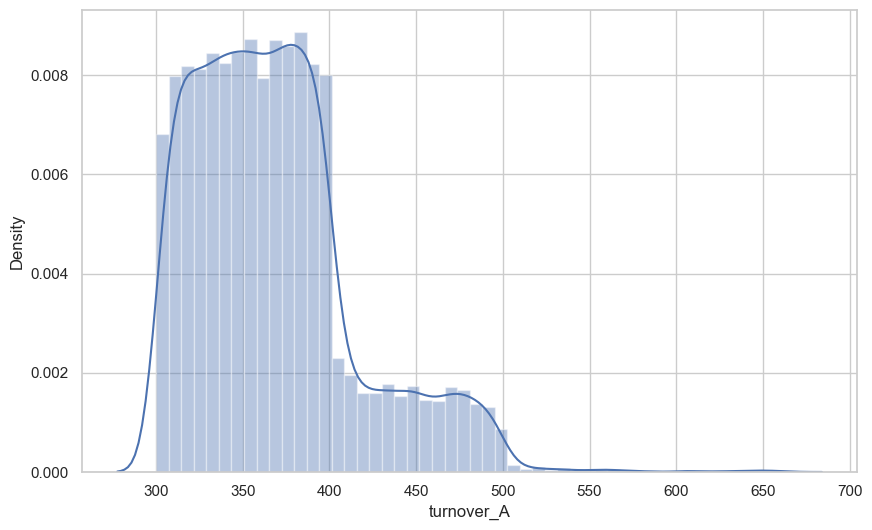

In [38]:
# For turnover variable outlier handling
sns.distplot(customer_df['turnover_A']);

In [39]:
print("Mode: "+str(np.round(customer_df['turnover_A'].mode()[0], decimals=2)))
print("Median: "+str(np.round(customer_df['turnover_A'].median(), decimals=2)))
print("Mean: "+str(np.round(customer_df['turnover_A'].mean(), decimals=2)))
print("Min: "+str(np.round(customer_df['turnover_A'].min(), decimals=2)))
print("Max: "+str(np.round(customer_df['turnover_A'].max(), decimals=2)))

Mode: 300.1
Median: 361.7
Mean: 368.15
Min: 300.1
Max: 661.51


In [40]:
customer_df['turnover_A'].describe()

count    10404.000000
mean       368.145312
std         47.668208
min        300.095909
25%        332.229899
50%        361.695745
75%        391.117121
max        661.507779
Name: turnover_A, dtype: float64

75% of the turnover_A < ~391

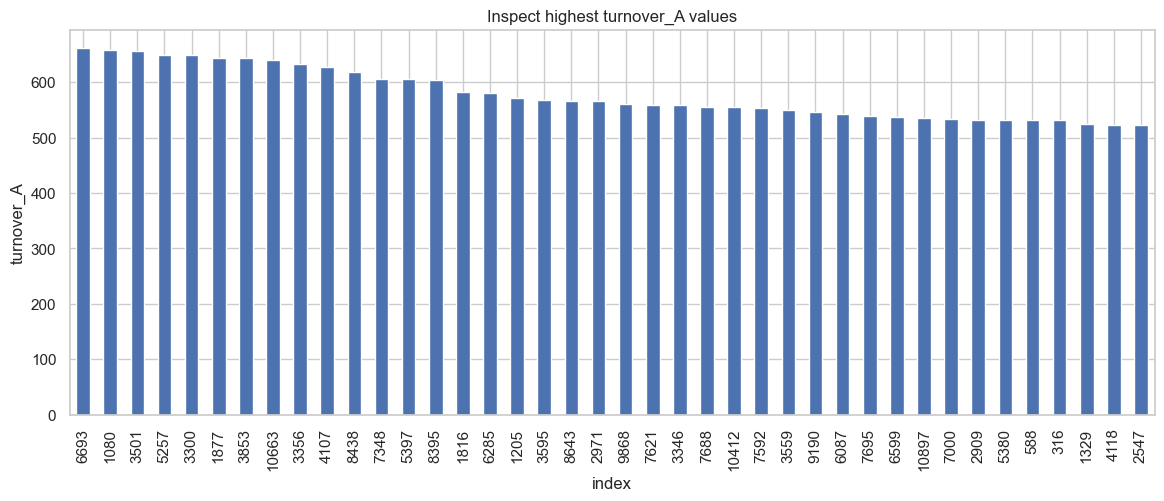

In [41]:
# plot 40 highest values to check if valid outliers
plt.figure(figsize=(14, 5))
customer_df['turnover_A'].sort_values(ascending=False).head(40).plot(kind='bar')
plt.xlabel('index')
plt.ylabel('turnover_A')
plt.title('Inspect highest turnover_A values')
plt.show()

Looks like they are valid outliers (inverse exponential drop in turnover_A)

__Effect of removing turnover A > 400__

In [42]:
df_turnover_A_reduced_plot = customer_df.drop(customer_df[customer_df['turnover_A'] > 400].index)

In [43]:
print("Mode: "+str(np.round(df_turnover_A_reduced_plot['turnover_A'].mode()[0], decimals=2)))
print("Median: "+str(np.round(df_turnover_A_reduced_plot['turnover_A'].median(), decimals=2)))
print("Mean: "+str(np.round(df_turnover_A_reduced_plot['turnover_A'].mean(), decimals=2)))
print("Min: "+str(np.round(df_turnover_A_reduced_plot['turnover_A'].min(), decimals=2)))
print("Max: "+str(np.round(df_turnover_A_reduced_plot['turnover_A'].max(), decimals=2)))

Mode: 300.1
Median: 351.61
Mean: 351.3
Min: 300.1
Max: 400.0


Mean and median closer to each other

Distribution closer to normal (see kurt and skew) -> model works best with normal dist

In [44]:
df_turnover_A_reduced_plot['turnover_A'].describe()

count    8622.000000
mean      351.297503
std        28.522896
min       300.095909
25%       326.770553
50%       351.605832
75%       376.045937
max       399.999115
Name: turnover_A, dtype: float64

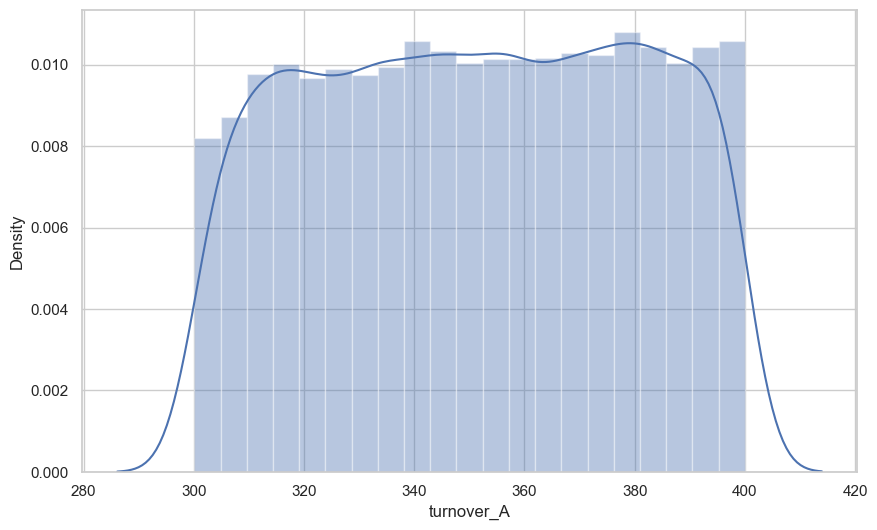

In [45]:
sns.distplot(df_turnover_A_reduced_plot['turnover_A'])
plt.show()

__Turnover_B__

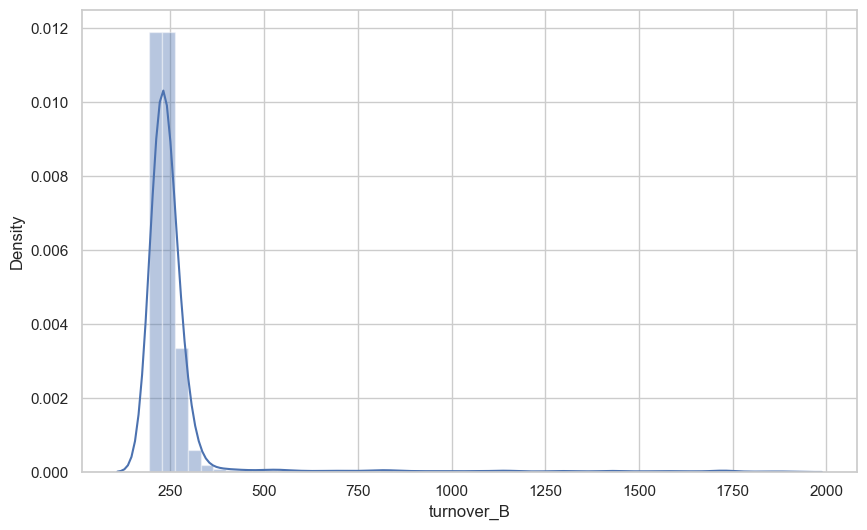

In [46]:
sns.distplot(customer_df['turnover_B'])
plt.show()

In [47]:
print("Mode: "+str(np.round(customer_df['turnover_B'].mode()[0], decimals=2)))
print("Median: "+str(np.round(customer_df['turnover_B'].median(), decimals=2)))
print("Mean: "+str(np.round(customer_df['turnover_B'].mean(), decimals=2)))
print("Min: "+str(np.round(customer_df['turnover_B'].min(), decimals=2)))
print("Max: "+str(np.round(customer_df['turnover_B'].max(), decimals=2)))

Mode: 193.46
Median: 233.62
Mean: 269.07
Min: 193.46
Max: 1902.77


In [48]:
customer_df['turnover_B'].describe()

count    10404.000000
mean       269.071900
std        180.988707
min        193.458345
25%        217.637224
50%        233.621169
75%        249.320909
max       1902.773378
Name: turnover_B, dtype: float64

75% of the turnover_B < ~254

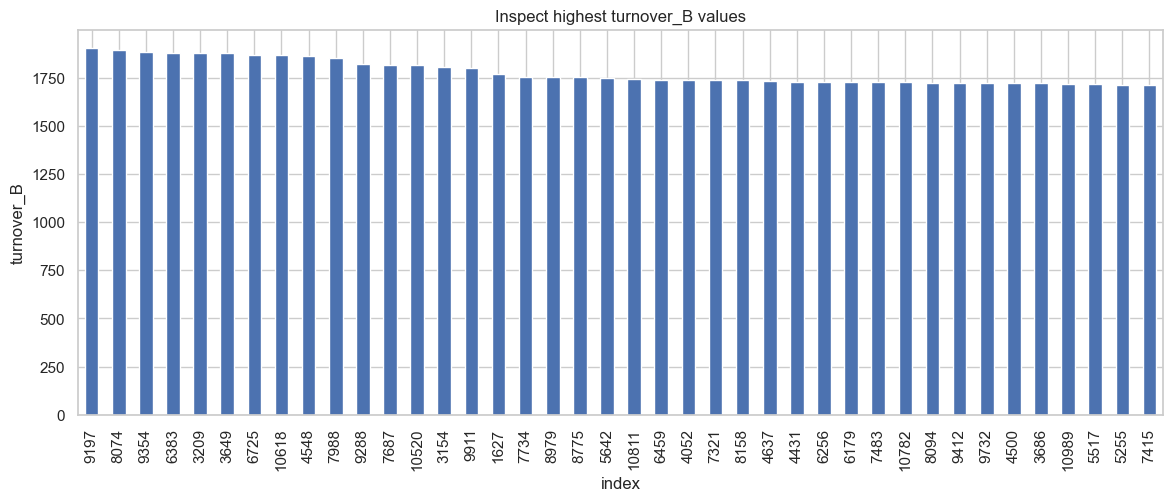

In [49]:
# plot 40 highest values to check if outliers are valid
plt.figure(figsize=(14, 5))
customer_df['turnover_B'].sort_values(ascending=False).head(40).plot(kind='bar')
plt.xlabel('index')
plt.ylabel('turnover_B')
plt.title('Inspect highest turnover_B values')
plt.show()

Effect of removing both turnover B > 260 and A > 400

In [50]:
df_TO_A_B_reduced_plot = df_turnover_A_reduced_plot.drop(df_turnover_A_reduced_plot[df_turnover_A_reduced_plot['turnover_B'] >= 260].index)

In [51]:
print("Mode: "+str(np.round(df_TO_A_B_reduced_plot['turnover_B'].mode()[0], decimals=2)))
print("Median: "+str(np.round(df_TO_A_B_reduced_plot['turnover_B'].median(), decimals=2)))
print("Mean: "+str(np.round(df_TO_A_B_reduced_plot['turnover_B'].mean(), decimals=2)))
print("Min: "+str(np.round(df_TO_A_B_reduced_plot['turnover_B'].min(), decimals=2)))
print("Max: "+str(np.round(df_TO_A_B_reduced_plot['turnover_B'].max(), decimals=2)))

Mode: 199.35
Median: 227.08
Mean: 226.93
Min: 199.35
Max: 259.99


In [52]:
df_TO_A_B_reduced_plot['turnover_B'].describe()

count    7464.000000
mean      226.934874
std        15.118453
min       199.350446
25%       214.258067
50%       227.075494
75%       239.612283
max       259.994027
Name: turnover_B, dtype: float64

In [53]:
customer_df1 = customer_df.drop(customer_df[customer_df['turnover_B'] >= 260].index)

In [54]:
customer_df1.shape

(8392, 16)

In [55]:
customer_df1.columns

Index(['TARGET', 'loyalty', 'ID', 'age', 'city', 'LOR', 'prod_A', 'type_A',
       'type_B', 'prod_B', 'turnover_A', 'turnover_B', 'contract', 'age_P',
       'lor_M', 'age_group'],
      dtype='object')

From our EDA we are able to decide few variables we will not use for our model building. Few of them have collinearity and few of them have no significant prediction like ID and Contract variables.

In [56]:
customer_df1 .drop(['ID', 'city','LOR', 'age','contract','type_A', 'type_B','prod_B', 'age_group'], axis = 1, inplace = True )

In [57]:
customer_df1.head()

,TARGET,loyalty,prod_A,turnover_A,turnover_B,age_P,lor_M
3,1,99,0,453.757916,242.341754,31,3
5,1,3,1,460.442339,247.467516,24,15
6,1,99,0,494.463651,215.976127,57,3
7,1,99,0,472.651570,246.208737,32,3
8,1,99,0,451.717690,252.719435,28,3


The above table shows the final selected varaibles to be used in our modelling process, as they are relevant and don't have multicollinearity in there relations.

# Data Prepped Review

In this section we will display the work done in data preparation and see the difference after cleaning the data. View the data distribution after removing outliers.

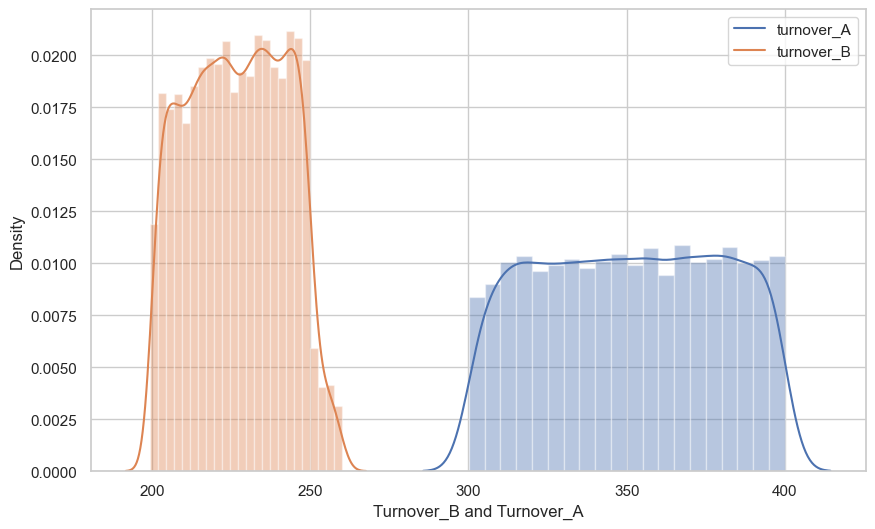

In [58]:
# Create density plots for 'turnover_A' and 'turnover_B' using Seaborn
sns_plot = sns.distplot(df_TO_A_B_reduced_plot['turnover_A'])
sns_plot = sns.distplot(df_TO_A_B_reduced_plot['turnover_B'])

# Set x-axis label
plt.xlabel('Turnover_B and Turnover_A')

# Add a legend to the figure with labels for each density plot
plt.legend(labels=['turnover_A', 'turnover_B'])

# Display the plot
plt.show()

# Adjust layout for better visualization
fig.tight_layout()

After removing outliers from turnover_a and turnover_B we can see the distribution is much better than earlier. 

Correlation matrix before modeling

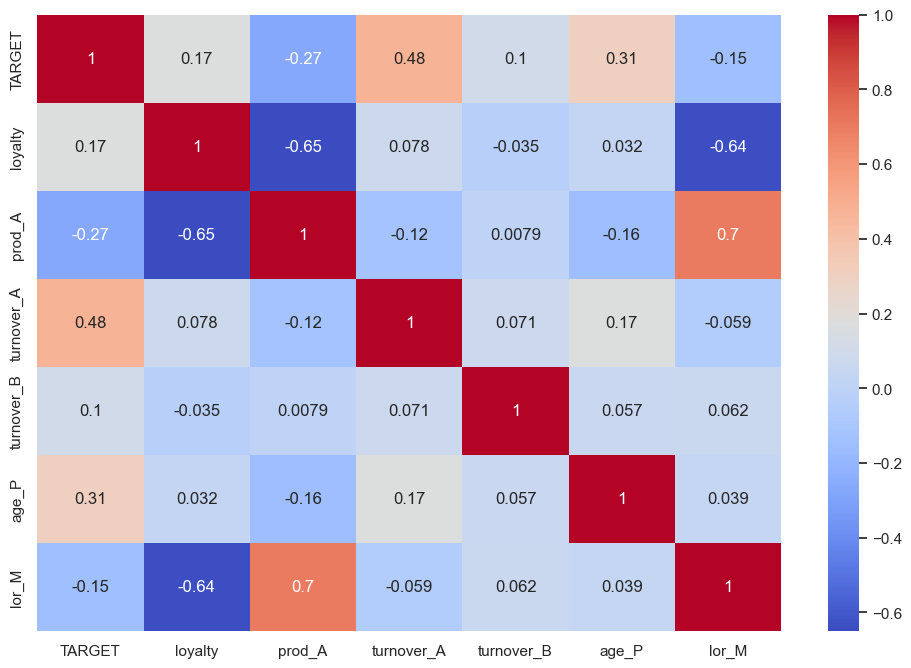

In [59]:
cm_combo = customer_df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cm_combo, annot=True, cmap='coolwarm');

__Box Plot for numerical variables after data wrangling__

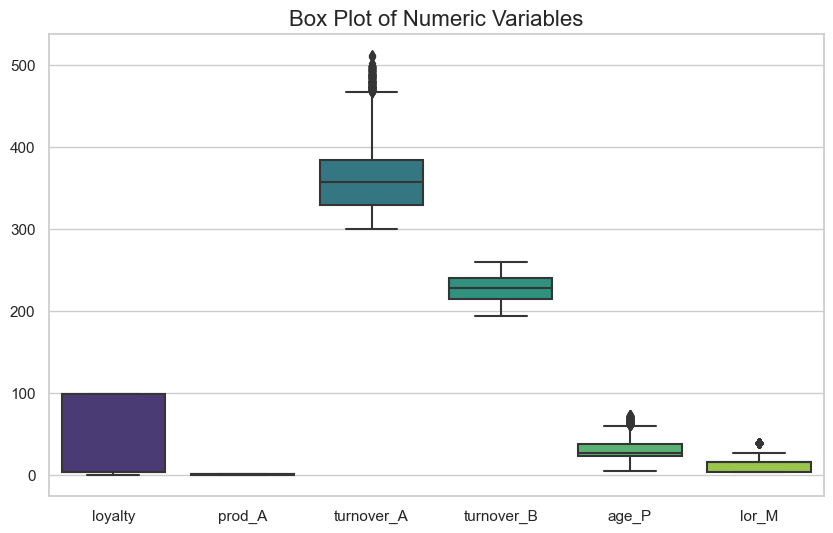

In [60]:
# Box plot for each numeric variable
sns.boxplot(data=customer_df1[numerical_columns], palette='viridis')
# Set the title of the plot
plt.title('Box Plot of Numeric Variables', fontsize=16)

# Display the plot
plt.show();

After outliers handling with z score method now results are much better than earlier but not perfect as expected.

# Regression Model Building
To fit the data into the model we need to split the data as train test first. Then normalize or standardize, Feature selection, dimensionality reduction, then model building.

In [61]:
# Check our dataframe features 
customer_df1.columns

Index(['TARGET', 'loyalty', 'prod_A', 'turnover_A', 'turnover_B', 'age_P',
       'lor_M'],
      dtype='object')

__Create a combinations of explanatory variables__

In [62]:
# Let's take three different sets of features
features_set_1 = ['turnover_A', 'prod_A', 'turnover_B']
features_set_2 = ['loyalty', 'age_P', 'lor_M']
features_set_3 = ['prod_A', 'turnover_B', 'age_P']

In [63]:
# Split the data into training and testing sets
X = customer_df1[features_set_1 + features_set_2 + features_set_3]
y = customer_df1['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# Create three logistic regression models with different feature sets
logreg_model_1 = LogisticRegression(random_state=42)
logreg_model_2 = LogisticRegression(random_state=42)
logreg_model_3 = LogisticRegression(random_state=42)

In [66]:
# Fit the models on the training data
logreg_model_1.fit(X_train[features_set_1], y_train)
logreg_model_2.fit(X_train[features_set_2], y_train)
logreg_model_3.fit(X_train[features_set_3], y_train)

LogisticRegression(random_state=42)

In [67]:
# Predictions on the testing data
y_pred_1 = logreg_model_1.predict(X_test[features_set_1])
y_pred_2 = logreg_model_2.predict(X_test[features_set_2])
y_pred_3 = logreg_model_3.predict(X_test[features_set_3])

# Model Evaluation and Selection

In [68]:
# Evaluate the models
print("Model 1 - Classification Report:\n", classification_report(y_test, y_pred_1))
print("Model 1 - Accuracy:", accuracy_score(y_test, y_pred_1))

print("\nModel 2 - Classification Report:\n", classification_report(y_test, y_pred_2))
print("Model 2 - Accuracy:", accuracy_score(y_test, y_pred_2))

print("\nModel 3 - Classification Report:\n", classification_report(y_test, y_pred_3))
print("Model 3 - Accuracy:", accuracy_score(y_test, y_pred_3))

Model 1 - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93      1328
           1       0.92      0.46      0.62       351

    accuracy                           0.88      1679
   macro avg       0.90      0.73      0.77      1679
weighted avg       0.88      0.88      0.86      1679

Model 1 - Accuracy: 0.8796902918403812

Model 2 - Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1328
           1       0.43      0.12      0.18       351

    accuracy                           0.78      1679
   macro avg       0.62      0.54      0.53      1679
weighted avg       0.73      0.78      0.73      1679

Model 2 - Accuracy: 0.782608695652174

Model 3 - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      1328
           1       0.49      0.18      0.27       351

 

 We wanted to focus on the classification reports and accuracy scores for each model. The classification report provides metrics such as precision, recall, and F1-score for both classes (0 and 1), while accuracy gives an overall measure of how well the model is performing.
 
Model 1 has the highest accuracy and better precision, recall, and F1-score for Class 1 compared to Models 2 and 3.
Model 2 has the lowest accuracy and poor precision, recall, and F1-score for Class 1.
Model 3 has slightly better performance than Model 2, but still lower than Model 1.

When communicating with our customer about insurance purchase probability, we should highlight that Model 1 performs the best overall, with higher accuracy and better metrics for identifying customers likely to make a purchase. However, it's essential to consider the specific business context and the trade-offs between false positives and false negatives based on the objectives of the insurance purchase prediction task. If precision or recall is of particular importance, you may need to tailor the interpretation accordingly. We will see ROC curve in the next step.

__Apply Cross validation method for each model__

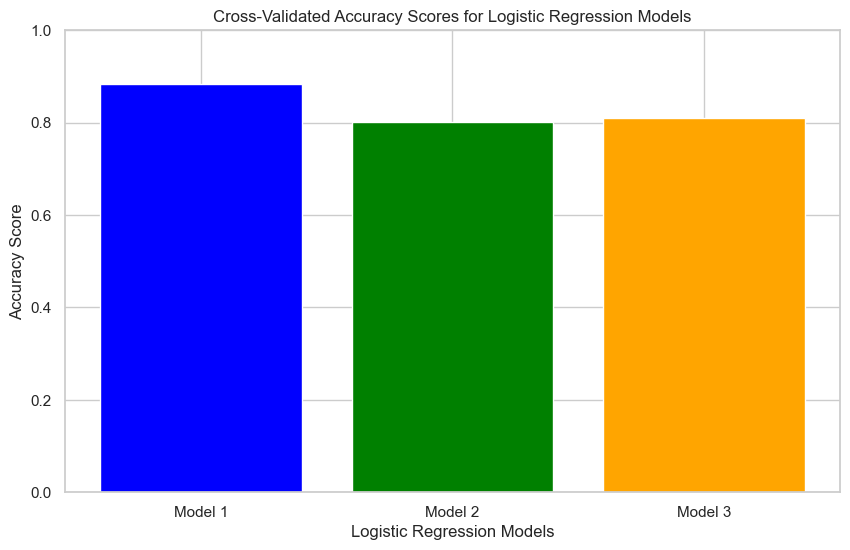

In [70]:
# Calculate cross-validated accuracy scores for each model
cv_scores_1 = cross_val_score(logreg_model_1, X_train[features_set_1], y_train, cv=5, scoring='accuracy')
cv_scores_2 = cross_val_score(logreg_model_2, X_train[features_set_2], y_train, cv=5, scoring='accuracy')
cv_scores_3 = cross_val_score(logreg_model_3, X_train[features_set_3], y_train, cv=5, scoring='accuracy')

# Plotting the results
models = ['Model 1', 'Model 2', 'Model 3']
scores = [np.mean(cv_scores_1), np.mean(cv_scores_2), np.mean(cv_scores_3)]

plt.bar(models, scores, color=['blue', 'green', 'orange'])
plt.title('Cross-Validated Accuracy Scores for Logistic Regression Models')
plt.xlabel('Logistic Regression Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis limit to ensure visibility
plt.show();

**Observation:** The bar chart illustrates the cross-validated accuracy scores for three logistic regression models. Model 1 has the highest accuracy score, exceeding 0.8, which indicates it outperforms the other two models in terms of correctly predicting whether a customer will purchase an additional insurance product. Model 2 has a score slightly under 0.8, and Model 3 has the lowest accuracy score, though it's still near the 0.8 mark. The y-axis is limited to a range from 0 to 1 for better visibility of the differences in model performance.

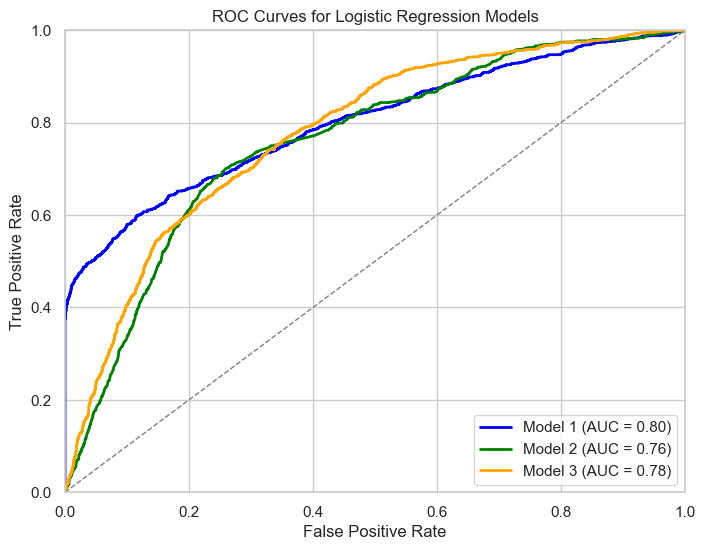

In [71]:
# Get predicted probabilities using cross-validation
y_proba_1 = cross_val_predict(logreg_model_1, X_train[features_set_1], y_train, cv=5, method='predict_proba')[:, 1]
y_proba_2 = cross_val_predict(logreg_model_2, X_train[features_set_2], y_train, cv=5, method='predict_proba')[:, 1]
y_proba_3 = cross_val_predict(logreg_model_3, X_train[features_set_3], y_train, cv=5, method='predict_proba')[:, 1]

# Compute ROC curve and AUC for each model
fpr_1, tpr_1, _ = roc_curve(y_train, y_proba_1)
roc_auc_1 = auc(fpr_1, tpr_1)

fpr_2, tpr_2, _ = roc_curve(y_train, y_proba_2)
roc_auc_2 = auc(fpr_2, tpr_2)

fpr_3, tpr_3, _ = roc_curve(y_train, y_proba_3)
roc_auc_3 = auc(fpr_3, tpr_3)

# Plotting ROC curves
plt.figure(figsize=(8, 6))

plt.plot(fpr_1, tpr_1, color='blue', lw=2, label=f'Model 1 (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_2, tpr_2, color='green', lw=2, label=f'Model 2 (AUC = {roc_auc_2:.2f})')
plt.plot(fpr_3, tpr_3, color='orange', lw=2, label=f'Model 3 (AUC = {roc_auc_3:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression Models')
plt.legend(loc='lower right')

plt.show();

**Observation** The line graph presents the Receiver Operating Characteristic (ROC) curves for three logistic regression models, illustrating their performance in classifying customers likely to purchase an additional insurance product. Model 1, depicted in blue, achieves the highest Area Under the Curve (AUC) value of 0.80, indicating a good balance between sensitivity (true positive rate) and specificity (1 - false positive rate). Model 2 (in green) and Model 3 (in orange) show slightly lower AUC values of 0.76 and 0.78, respectively, suggesting they have less discriminative power than Model 1. The graph's diagonal dashed line represents a no-skill classifier; all models are above this line, confirming that they have learned patterns from the data.

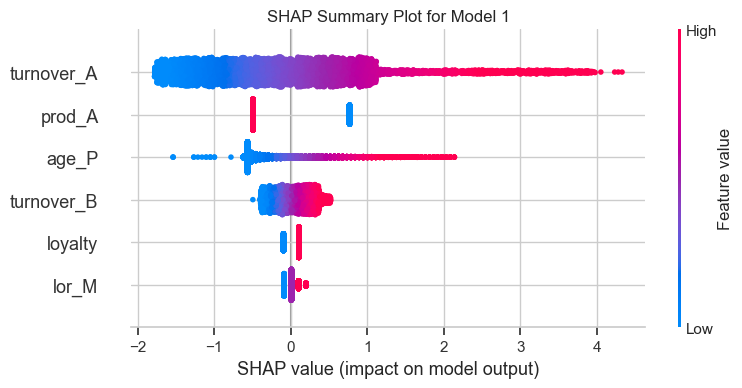

In [72]:
# Extract the features and target variable
x = customer_df1.drop(['TARGET'], axis = 1)
y = customer_df1['TARGET']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Create a logistic regression model
logreg_model_1 = LogisticRegression(random_state=42)
logreg_model_1.fit(X_scaled, y)

# Explain the model predictions using SHAP values
explainer = shap.Explainer(logreg_model_1, X_scaled)
shap_values = explainer.shap_values(X_scaled)

# Create a summary plot
shap.summary_plot(shap_values, X_scaled, feature_names=x.columns, show=False)

# Show the plot
plt.title('SHAP Summary Plot for Model 1')
plt.show();

**Observation** The SHAP summary plot for Model 1 shows the impact of different features on the model's output. The feature 'turnover_A' appears to have the most significant impact on the model's predictions, with higher values leading to a higher SHAP value, thus a greater likelihood of purchasing an additional insurance product. The features 'prod_A' and 'age_P' show a mix of positive and negative impacts on the predictions. 'turnover_B' seems to have a moderate impact, while 'loyalty' and 'lor_M' have the least impact. The color scale indicates the feature value, with pink representing high and blue representing low. The spread of the dots shows the variability of the SHAP values for each feature, indicating the distribution of the impact each feature has on the model output.

# Conclusion

In the end, our project to prediction if a customer will buy more insurance went really well. We looked at a lot of data, cleaned it up, and made sure everything was ready before we made three different prediction models. Out of all of them, the first model (Model 1) was the best at figuring out who would buy more.

We learned that how much people spent on their first insurance product (we are calling this 'turnover_A') is super important through the SHAP Plot. It is a strong indicator that they might want to buy more. The charts we made showed us that when 'turnover_A' goes up, people are more likely to get another insurance product.

What this means for the insurance company is pretty clear: they should keep an eye on customers who are really into the insurance they already have because they might want more. This is a good way for the company to sell more without bugging the wrong customers.

Looking ahead, the company could try out even smarter models to see if they can get better at predicting. And they should keep checking to make sure the model stays good over time.

To wrap it up, our analysis has given the insurance company a insights through the first and best prediction model.

# Reference


In our project, we have used some helpful resources that guided our data analysis and model-building process. Here's where we got our information and inspiration:

1. Our data came from a Kaggle dataset, which was essential for training our logistic regression models. You can find this dataset at Kaggle: Insurance Company.
https://www.kaggle.com/datasets/rluyck/insurance-company

2. For understanding how to build a logistic regression model step by step in Python, we referred to an informative article on Towards Data Science. It was a great help in structuring our approach. Check out the guide here: Building a Logistic Regression in Python.
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 

These resources were the backbone of our analytical journey, providing us with the data and the know-how to create predictive models that can truly make a difference in strategic decision-making.